<a href="https://colab.research.google.com/github/Khamaldeeen/Stock-Market-Analysis-Apple-/blob/Analytics0.1/Stock_Market_Prediction_of_MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import math
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
from pandas_datareader import DataReader

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
end = datetime.today()

start = end.year - 7

MSFT = DataReader('MSFT', 'yahoo', start= start, end = end)
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,27.730000,27.150000,27.250000,27.620001,52899300.0,23.362539
2013-01-03,27.650000,27.160000,27.629999,27.250000,48294400.0,23.049566
2013-01-04,27.340000,26.730000,27.270000,26.740000,52521100.0,22.618179
2013-01-07,26.879999,26.639999,26.770000,26.690001,37110400.0,22.575893
2013-01-08,26.790001,26.459999,26.750000,26.549999,44703100.0,22.457466


In [9]:
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,27.730000,27.150000,27.250000,27.620001,52899300.0,23.362539
2013-01-03,27.650000,27.160000,27.629999,27.250000,48294400.0,23.049566
2013-01-04,27.340000,26.730000,27.270000,26.740000,52521100.0,22.618179
2013-01-07,26.879999,26.639999,26.770000,26.690001,37110400.0,22.575893
2013-01-08,26.790001,26.459999,26.750000,26.549999,44703100.0,22.457466
...,...,...,...,...,...,...
2020-04-09,167.369995,163.330002,166.360001,165.139999,51431800.0,165.139999
2020-04-13,165.570007,162.300003,164.350006,165.509995,41905300.0,165.509995
2020-04-14,173.750000,168.000000,169.000000,173.699997,52874300.0,173.699997


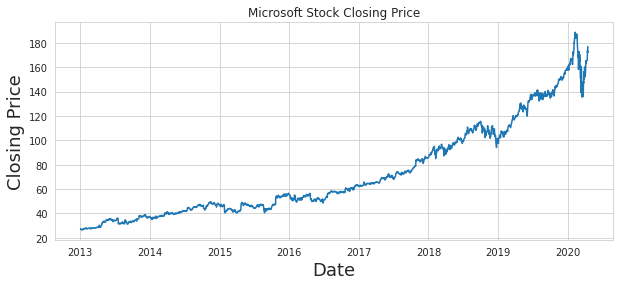

In [13]:
plt.figure(figsize=(10,4))
plt.title('Microsoft Stock Closing Price')
plt.ylabel('Closing Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.plot(MSFT['Close'])
plt.show()

In [0]:
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
cls = MSFT.filter(['Close'], axis=1)

In [0]:
cls = cls.values

In [0]:
cls_train_val = math.ceil(len(cls) * 0.8)

In [31]:
cls_train_val

1468

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(cls)

scaled_data

array([[0.00714991],
       [0.00486934],
       [0.00172584],
       ...,
       [0.90754438],
       [0.89632648],
       [0.92813114]])

In [43]:
train_data = scaled_data[0:cls_train_val, :]

x_train = []
y_train = []

for i in range(60, cls_train_val):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00714991, 0.00486934, 0.00172584, 0.00141766, 0.00055473,
       0.0014793 , 0.        , 0.00228058, 0.0026504 , 0.00462278,
       0.00357496, 0.00486934, 0.00486934, 0.00425296, 0.00708827,
       0.00721154, 0.00875247, 0.00893738, 0.00955375, 0.00856756,
       0.00610208, 0.00906066, 0.00604044, 0.00641026, 0.00542407,
       0.00505425, 0.00671844, 0.0086292 , 0.00875247, 0.00967703,
       0.00973867, 0.00955375, 0.0098003 , 0.00869084, 0.00634862,
       0.00801283, 0.00560899, 0.00560899, 0.00832101, 0.00825937,
       0.00918394, 0.01041667, 0.01164942, 0.01004685, 0.01035503,
       0.00949212, 0.00869084, 0.00893738, 0.00899902, 0.01035503,
       0.00973867, 0.01010849, 0.01060159, 0.0114645 , 0.01017013,
       0.01103304, 0.01047831, 0.01047831, 0.01177269, 0.01325198])]
[0.0132519819661501]



In [44]:
scaled_data.shape

(1835, 1)

In [45]:
len(x_train)

1408

In [46]:
len(y_train)

1408

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
x_train.shape

(1408, 60)

In [49]:
x_train

array([[0.00714991, 0.00486934, 0.00172584, ..., 0.01047831, 0.01177269,
        0.01325198],
       [0.00486934, 0.00172584, 0.00141766, ..., 0.01177269, 0.01325198,
        0.01325198],
       [0.00172584, 0.00141766, 0.00055473, ..., 0.01325198, 0.01325198,
        0.01442308],
       ...,
       [0.49198718, 0.49993837, 0.50283532, ..., 0.5126356 , 0.50320513,
        0.46757891],
       [0.49993837, 0.50283532, 0.50339003, ..., 0.50320513, 0.46757891,
        0.5044379 ],
       [0.50283532, 0.50339003, 0.50801282, ..., 0.46757891, 0.5044379 ,
        0.49617851]])

In [51]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1408, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1408/1408 [==============================] - 54s 38ms/step - loss: 8.2034e-04


In [56]:
cls.shape

(1835, 1)

In [0]:
test_data = scaled_data[cls_train_val - 60 :, :]

x_test = []
y_test = cls[cls_train_val :, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, :])


In [80]:
len(x_test)

367

In [0]:
x_test = np.array(x_test)

In [82]:
x_test.shape

(367, 60, 1)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] , 1))

In [84]:
x_test.shape

(367, 60, 1)

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [87]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.000517717823995

In [93]:
new_data = MSFT.filter(['Close'])
train = new_data[:cls_train_val]
valid = new_data[cls_train_val:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [94]:
valid

,Close,Predictions
Date,,
2018-10-30,103.730003,105.166542
2018-10-31,106.809998,104.672829
2018-11-01,105.919998,104.363914
2018-11-02,106.160004,104.128220
2018-11-05,107.510002,103.968513
...,...,...
2020-04-09,165.139999,147.074707
2020-04-13,165.509995,148.305450
2020-04-14,173.699997,149.431061
